In [24]:
# Import everything needed
import numpy as np
import matplotlib.pyplot as plt
import string
import random



labels = list(string.ascii_uppercase)

def plot_locations_and_edges(locations, distance, order_label):
    n = len(order_label)
    labels_order = [order_label.index(labels[i]) for i in range(n)]
    
    order = [labels.index(order_label[i]) for i in range(n)]
    
    #print(order)
    x,y = np.transpose(locations);
    for i in range(n):
        plt.annotate(labels_order[i], [x[i]+2, y[i]])
        plt.annotate(labels[i], [x[i], y[i]])
    for i in range(n-1):
        #plt.arrow(locations[i,0],locations[i,1],locations[i+1,0]-locations[i,0],locations[i+1,1]-locations[i,1], head_width=2, head_length=4, fc='blue',  color = "blue")
        plt.plot([locations[order[i],0], locations[order[i+1],0]], [locations[order[i],1], locations[order[i+1],1]], color = "blue", linestyle = "solid", linewidth= 1)
    plt.plot([locations[order[0],0], locations[order[n-1],0]], [locations[order[0],1], locations[order[n-1],1]], color = "blue", linestyle = "solid", linewidth= 1)
    
    
    

    #plt.scatter(x,y, color = "red");
#     plt.xlim(-5,105)
#     plt.ylim(-5,105)
    plt.xlabel("x-coordinate")
    plt.ylabel("y-coordinate")
    plt.title("TSP Solution: Score = " + str(score(order, distance)))
    plt.show()


def dist(u,v):
    return np.sqrt((u[0] - v[0])**2 + (u[1] - v[1])**2)

def score(order, distance):
    return sum([distance[order[i],order[i+1]] for i in range(len(order)-1)]) + distance[order[0],order[len(order)-1]]


# Random instances:
def rand_locations(n):
    locations  = np.random.randint(100, size=(n, 2))
    distances = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            distances[i,j] = dist(locations[i], locations[j])
        
    return locations, distances

def initial_order(n):
    order = list(range(n))
    return [labels[i] for i in order]

def reversal(order, i,j):
    temp_order = order.copy()
    temp_order[i:j+1]= temp_order[i:j+1][::-1]
    return temp_order

def reversal_plot(locations, distance, order_label, I,J):
    n = len(order_label)
    n = len(order_label)
    order = [labels.index(order_label[i]) for i in range(n)]
    labels_order = [order_label.index(labels[i]) for i in range(n)]
    
    order_new = reversal(order, I,J)

    
    #print(order)
    x,y = np.transpose(locations);
    for i in range(n):
        plt.annotate(labels_order[i], [x[i]+2, y[i]])
        plt.annotate(labels[i], [x[i], y[i]])
    plt.xlabel("x-coordinate")
    plt.ylabel("y-coordinate")
    
    
    
    for i in range(n-1):
        #plt.arrow(locations[i,0],locations[i,1],locations[i+1,0]-locations[i,0],locations[i+1,1]-locations[i,1], head_width=2, head_length=4, fc='blue',  color = "blue")
        plt.plot([locations[order_new[i],0], locations[order_new[i+1],0]], [locations[order_new[i],1], locations[order_new[i+1],1]], color = "blue", linestyle = "solid", linewidth= 1)
    plt.plot([locations[order_new[0],0], locations[order_new[n-1],0]], [locations[order_new[0],1], locations[order_new[n-1],1]], color = "blue", linestyle = "solid", linewidth= 1)
    
    
    for i in [I-1,J]:
        i1 = i; i2 = i+1;
        if i2 == n:
            i2 = 0
        #plt.arrow(locations[i,0],locations[i,1],locations[i+1,0]-locations[i,0],locations[i+1,1]-locations[i,1], head_width=2, head_length=4, fc='blue',  color = "blue")
        plt.plot([locations[order[i1],0], locations[order[i2],0]], [locations[order[i1],1], locations[order[i2],1]], color = "red", linestyle = "solid", linewidth= 2)
        plt.plot([locations[order_new[i1],0], locations[order_new[i2],0]], [locations[order_new[i1],1], locations[order_new[i2],1]], color = "green", linestyle = "solid", linewidth= 2)
   
    
#     for e in [e1,e2]:
#         plt.plot([locations[e[0],0], locations[e[1],0]], [locations[e[0],1], locations[e[1],1]], color = "red", linestyle = "solid", linewidth= 2)
#     plt.plot([locations[e1[0],0], locations[e2[0],0]], [locations[e1[0],1], locations[e2[0],1]], color = "green", linestyle = "solid", linewidth= 2)
#     plt.plot([locations[e2[1],0], locations[e1[1],0]], [locations[e2[1],1], locations[e1[1],1]], color = "green", linestyle = "solid", linewidth= 2)
    
    
#     index_max = max([max([order.index(e[0]), order.index(e[1])]) for e in [e1,e2]])
#     index_min = min([min([order.index(e[0]), order.index(e[1])]) for e in [e1,e2]])
#     #print([index_max, index_min])
#     if a == 0:
#         index_max = n
#         index_min = min([order.index(e2[0]), order.index(e2[1])])
#     if b == 0:
#         index_max = n
#         index_min = min([order.index(e1[0]), order.index(e1[1])])
        
#     #print([index_max, index_min])
#     order = reversal(order, index_min+1, index_max)
    #print([index_min, index_max])
    #print(order)
    plt.title("TSP Solution: Score = " + str(score(order_new, distance)))
    plt.show()
    print([labels[i] for i in order_new])
    return [labels[i] for i in order_new]

def reversal_list(locations, distance, order_label):
    n = len(order_label)
    order = [labels.index(order_label[i]) for i in range(n)]
    labels_order = [order_label.index(labels[i]) for i in range(n)]
    
    for i in range(1,n-1):
        for j in range(i+1,n):
            order_temp = reversal(order, i, j)
            print(i,j, [labels[i] for i in order_temp])
            print("Reversal: "+ str(i) + str(j) + ", Score: " + str(score(order_temp, distance)))

def reversal_score(locations, distance, order_label, i,j):
    n = len(order_label)
    order = [labels.index(order_label[i]) for i in range(n)]
    labels_order = [order_label.index(labels[i]) for i in range(n)]
    order_temp = reversal(order, i, j)
    print([labels[i] for i in order_temp])
    print("Score: " + str(score(order_temp, distance)))
    return [labels[i] for i in order_temp]        
            
locations = np.array([[88, 79],
       [78, 10],
       [89, 73],
       [86,  1],
       [75, 61],
       [50, 47],
       [30, 23],
       [11, 40],
       [40,  8],
       [ 2, 17],
       [62, 45],
       [42, 97],
       [65, 31]])
distance = np.array([[  0.        ,  69.72087205,   6.08276253,  78.02563681,
         22.20360331,  49.67896939,  80.62257748,  86.31338251,
         85.70297544, 106.01886625,  42.80186912,  49.39635614,
         53.22593353],
       [ 69.72087205,   0.        ,  63.95310782,  12.04159458,
         51.0881591 ,  46.40043103,  49.72926704,  73.40980861,
         38.05259518,  76.32168761,  38.48376281,  94.15412896,
         24.69817807],
       [  6.08276253,  63.95310782,   0.        ,  72.0624729 ,
         18.43908891,  46.87216658,  77.3369252 ,  84.69356528,
         81.4002457 , 103.46496992,  38.89730068,  52.77309921,
         48.37354649],
       [ 78.02563681,  12.04159458,  72.0624729 ,   0.        ,
         61.        ,  58.41232747,  60.16643583,  84.53401682,
         46.5295605 ,  85.51023331,  50.11985634, 105.60303026,
         36.61966685],
       [ 22.20360331,  51.0881591 ,  18.43908891,  61.        ,
          0.        ,  28.65309756,  58.89821729,  67.35725648,
         63.51377803,  85.23496935,  20.61552813,  48.83646179,
         31.6227766 ],
       [ 49.67896939,  46.40043103,  46.87216658,  58.41232747,
         28.65309756,   0.        ,  31.2409987 ,  39.62322551,
         40.26164428,  56.60388679,  12.16552506,  50.6359556 ,
         21.9317122 ],
       [ 80.62257748,  49.72926704,  77.3369252 ,  60.16643583,
         58.89821729,  31.2409987 ,   0.        ,  25.49509757,
         18.02775638,  28.63564213,  38.83297568,  74.96665926,
         35.90264614],
       [ 86.31338251,  73.40980861,  84.69356528,  84.53401682,
         67.35725648,  39.62322551,  25.49509757,   0.        ,
         43.18564576,  24.69817807,  51.2445119 ,  64.88451279,
         54.74486277],
       [ 85.70297544,  38.05259518,  81.4002457 ,  46.5295605 ,
         63.51377803,  40.26164428,  18.02775638,  43.18564576,
          0.        ,  39.05124838,  43.0464865 ,  89.02246907,
         33.9705755 ],
       [106.01886625,  76.32168761, 103.46496992,  85.51023331,
         85.23496935,  56.60388679,  28.63564213,  24.69817807,
         39.05124838,   0.        ,  66.21178143,  89.4427191 ,
         64.5368112 ],
       [ 42.80186912,  38.48376281,  38.89730068,  50.11985634,
         20.61552813,  12.16552506,  38.83297568,  51.2445119 ,
         43.0464865 ,  66.21178143,   0.        ,  55.71355311,
         14.31782106],
       [ 49.39635614,  94.15412896,  52.77309921, 105.60303026,
         48.83646179,  50.6359556 ,  74.96665926,  64.88451279,
         89.02246907,  89.4427191 ,  55.71355311,   0.        ,
         69.89277502],
       [ 53.22593353,  24.69817807,  48.37354649,  36.61966685,
         31.6227766 ,  21.9317122 ,  35.90264614,  54.74486277,
         33.9705755 ,  64.5368112 ,  14.31782106,  69.89277502,
          0.        ]]) 
    

In [25]:
initial_order(13)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M']

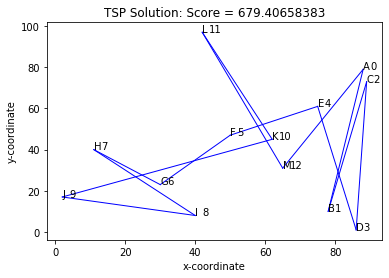

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M']

In [26]:
n = 13
current_order = initial_order(n)
plot_locations_and_edges(locations, distance, current_order)
current_order

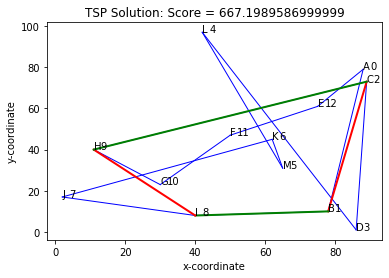

['A', 'B', 'I', 'J', 'K', 'M', 'L', 'D', 'C', 'H', 'G', 'F', 'E']


In [29]:
# Consider a random move
current_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M']
i = random.randrange(1,n-1)
j = random.randrange(i+1,n)
new_order = reversal_plot(locations, distance, current_order, i,j)

In [30]:

## 
# Current Score
Z_c = 651

# New Score
Z_n = 667

# Temperature
T = 900

### If Z_n < Z_c, accept the move and execute the command:
##  order = reversal_plot(locations, distance, order, i,j)

## Otherwise, accept the move with probability exp((Z_c - Z_n)/T)
random_num = random.uniform(0, 1)
print("Random Number: ", random_num)

probability_of_acceptance = np.exp((Z_c - Z_n)/T)

print("Probability to Accept: ", probability_of_acceptance)

print(random_num < probability_of_acceptance)

Random Number:  0.3366542186586827
Probability to Accept:  0.9823793146181776
True
